In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('Kerela_new.csv')
df = df.drop("Unnamed: 0", axis=1)

In [28]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [29]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,513769,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,456516,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,416804,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,434216,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,487753,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [30]:
data=df
data["No_of_hotel_booked"] = data["No_of_hotel_booked"]*4
data['Tourists']=data['No_of_hotel_booked']

In [13]:
data = df.copy()  # Create a copy of the DataFrame

month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

data['Month'] = data['Month'].map(month_mapping)

In [31]:
data.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,2055076,2010,1,2991,2055076,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,1826064,2010,2,2812,1826064,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,1667216,2010,3,3136,1667216,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,1736864,2010,4,2668,1736864,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,1951012,2010,5,2518,1951012,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
train_data = data['2010-01-01':'2022-12-01']
test_data = data['2010-01-01':'2022-12-01']

In [47]:
# Perform Holt-Winters Exponential Smoothing
# You can adjust the smoothing parameters (alpha, beta, gamma) and seasonal periods (seasonal) based on your data
model = ExponentialSmoothing(train_data['Tourists'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [48]:
# Make predictions for 2019
start_date = '2010-01-01'
end_date = '2022-12-01'
predictions = model_fit.predict(start=start_date, end=end_date)

In [23]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Tourists'], label="Training Data", marker='o')
plt.plot(test_data.index, test_data['Tourists'], label="Actual", marker='o')
plt.plot(predictions.index, predictions, label="Predicted", marker='o')

plt.xlabel("Time")
plt.ylabel("Total Tourists")
plt.legend()
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 1200x600 with 1 Axes>

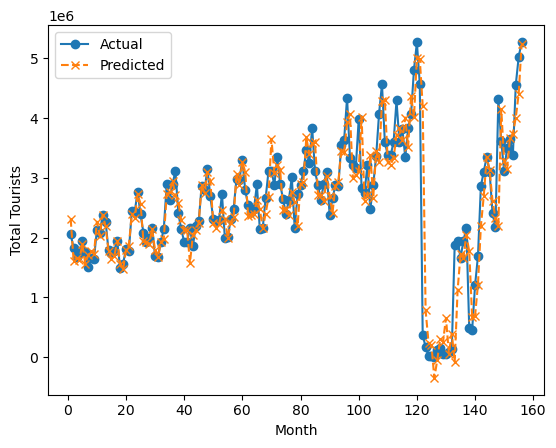

In [50]:
import matplotlib.pyplot as plt

# Assuming y_act and y_pred are defined
y_act = df.iloc[:]["Tourists"]
y_pred = predictions

# Create an array to represent the x-axis (assuming it's a time series)
x_values = range(1, 157)  # 1 to 12 to represent months

# Create a plot to display both y_act and y_pred
plt.plot(x_values, y_act, label="Actual", marker='o', linestyle='-')
plt.plot(x_values, y_pred, label="Predicted", marker='x', linestyle='--')

# Label the axes
plt.xlabel("Month")
plt.ylabel("Total Tourists")

# Set x-ticks to display month names
# month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# plt.xticks(x_values, month_names)

# Add a legend to differentiate between Actual and Predicted
plt.legend()

# Display the plot
plt.show()
